In [ ]:
import os
import tensorflow as tf #tf 2.0.0
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Image `Augmentation` for Increasing Dataset (Run Augmentation.py )

### ImageDataGenerator (in-place augmentation)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_data_gen = ImageDataGenerator(rotation_range=0,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0,
                                    horizontal_flip=False,
                                    vertical_flip=False,
                                    fill_mode='nearest',
                                    rescale=1./255)
valid_data_gen = ImageDataGenerator(rotation_range=0,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0,
                                    horizontal_flip=False,
                                    vertical_flip=False,
                                    fill_mode='nearest',
                                    #cval=0,
                                    rescale=1./255)

test_data_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
dataset_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/restes/dataset/Putri Navia Splited')

Batch_size = 64
img_h = 224
img_w = 224
num_classes=40

classes = ['A full',
 'A half',
 'A seper16',
 'A seper4',
 'A seper8',
 'B full',
 'B half',
 'B seper16',
 'B seper4',
 'B seper8',
 'C full',
 'C half',
 'C seper16',
 'C seper4',
 'C seper8',
 "C' full",
 "C' half",
 "C' seper16",
 "C' seper4",
 "C' seper8",
 'D full',
 'D half',
 'D seper16',
 'D seper4',
 'D seper8',
 'E full',
 'E half',
 'E seper16',
 'E seper4',
 'E seper8',
 'F full',
 'F half',
 'F seper16',
 'F seper4',
 'F seper8',
 'G full',
 'G half',
 'G seper16',
 'G seper4',
 'G seper8'
           ]

In [ ]:
# Training
SEED = 1234
tf.random.set_seed(SEED) 

training_dir = os.path.join(dataset_dir, 'Train')
train_gen = train_data_gen.flow_from_directory(training_dir,
                                               target_size=(224, 224),
                                               batch_size=Batch_size,
                                               classes=classes,
                                               class_mode='categorical',
                                               shuffle=True,
                                               seed=SEED)

# Validation
valid_dir = os.path.join(dataset_dir, 'Valid')
valid_gen = valid_data_gen.flow_from_directory(valid_dir,
                                           target_size=(224, 224),
                                           batch_size=Batch_size, 
                                           classes=classes,
                                           class_mode='categorical',
                                           shuffle=False,
                                           seed=SEED)
# Test
test_dir = os.path.join(dataset_dir, 'Test')
test_gen = test_data_gen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=10, 
                                             shuffle=False,
                                             seed=SEED,
                                             class_mode=None,
                                             )




Found 1366 images belonging to 40 classes.
Found 195 images belonging to 40 classes.
Found 173 images belonging to 40 classes.


In [ ]:
nama_class = test_gen.class_indices
print(nama_class)

{'A full': 0, 'A half': 1, 'A seper16': 2, 'A seper4': 3, 'A seper8': 4, 'B full': 5, 'B half': 6, 'B seper16': 7, 'B seper4': 8, 'B seper8': 9, 'C full': 10, 'C half': 11, 'C seper16': 12, 'C seper4': 13, 'C seper8': 14, "C' full": 15, "C' half": 16, "C' seper16": 17, "C' seper4": 18, "C' seper8": 19, 'D full': 20, 'D half': 21, 'D seper16': 22, 'D seper4': 23, 'D seper8': 24, 'E full': 25, 'E half': 26, 'E seper16': 27, 'E seper4': 28, 'E seper8': 29, 'F full': 30, 'F half': 31, 'F seper16': 32, 'F seper4': 33, 'F seper8': 34, 'G full': 35, 'G half': 36, 'G seper16': 37, 'G seper4': 38, 'G seper8': 39}


In [ ]:
li = list(nama_class.keys())
print(li)

['A full', 'A half', 'A seper16', 'A seper4', 'A seper8', 'B full', 'B half', 'B seper16', 'B seper4', 'B seper8', 'C full', 'C half', 'C seper16', 'C seper4', 'C seper8', "C' full", "C' half", "C' seper16", "C' seper4", "C' seper8", 'D full', 'D half', 'D seper16', 'D seper4', 'D seper8', 'E full', 'E half', 'E seper16', 'E seper4', 'E seper8', 'F full', 'F half', 'F seper16', 'F seper4', 'F seper8', 'G full', 'G half', 'G seper16', 'G seper4', 'G seper8']


## Visualization data 

In [ ]:
CLASS_NAMES = np.array(['A full',
 'A half',
 'A seper16',
 'A seper4',
 'A seper8',
 'B full',
 'B half',
 'B seper16',
 'B seper4',
 'B seper8',
 'C full',
 'C half',
 'C seper16',
 'C seper4',
 'C seper8',
 "C' full",
 "C' half",
 "C' seper16",
 "C' seper4",
 "C' seper8",
 'D full',
 'D half',
 'D seper16',
 'D seper4',
 'D seper8',
 'E full',
 'E half',
 'E seper16',
 'E seper4',
 'E seper8',
 'F full',
 'F half',
 'F seper16',
 'F seper4',
 'F seper8',
 'G full',
 'G half',
 'G seper16',
 'G seper4',
 'G seper8',], dtype='<U10')

import matplotlib.pyplot as plt

def show_batch(image_batch, label_batch):
  plt.figure(figsize=(25,25))
  for n in range(8):
      ax = plt.subplot(1,8,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')
      
image_batch, label_batch = next(train_gen)
show_batch(image_batch, label_batch)

### ResNet152V2 Model 

In [ ]:
ResNet_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(img_h, img_w, 3))

In [ ]:
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in ResNet_model.layers[:-15]:
    layer.trainable = False

x = ResNet_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.4)(x)
output  = Dense(units=40, activation='softmax')(x)
model = Model(ResNet_model.input, output)


model.summary()


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, TensorBoard, EarlyStopping
import time
import datetime

now = datetime.datetime.now
t = now()
lrr = ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)

NAME = "logs{}".format(int(time.time()))
tensorboard = TensorBoard(
    log_dir='/content/drive/MyDrive/Colab Notebooks/restes/Hasil Training/{}'.format(NAME))


checkpointer = ModelCheckpoint(
    filepath='/content/drive/MyDrive/Colab Notebooks/restes/Hasil Training/best_model.h5', 
    monitor='val_accuracy', 
    save_best_only=True, 
    mode='auto')

#earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

callbacks = [lrr, tensorboard, checkpointer]

STEP_SIZE_TRAIN=train_gen.n//train_gen.batch_size
STEP_SIZE_VALID=valid_gen.n//valid_gen.batch_size
transfer_learning_history = model.fit_generator(generator=train_gen,
                   steps_per_epoch=STEP_SIZE_TRAIN,
                   validation_data=valid_gen,
                   validation_steps=STEP_SIZE_VALID,
                   epochs=150,
                   verbose=1,
                  callbacks=callbacks,                                 
)
print('Jumlah train data: ', STEP_SIZE_TRAIN)
print('Jumlah validation data: ', STEP_SIZE_VALID)
print(transfer_learning_history.history.keys())
print('Training time: %s' % (now() - t))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/150
21/21 [==============================] - 38s 1s/step - loss: 3.1648 - accuracy: 0.1659 - val_loss: 5.9976 - val_accuracy: 0.2344
Epoch 2/150
21/21 [==============================] - 22s 1s/step - loss: 2.0740 - accuracy: 0.3886 - val_loss: 4.7885 - val_accuracy: 0.3385
Epoch 3/150
21/21 [==============================] - 25s 1s/step - loss: 1.5027 - accuracy: 0.5312 - val_loss: 3.2502 - val_accuracy: 0.5208
Epoch 4/150
21/21 [==============================] - 22s 1s/step - loss: 1.1569 - accuracy: 0.6321 - val_loss: 2.0279 - val_accuracy: 0.5885
Epoch 5/150
21/21 [==============================] - 24s 1s/step - loss: 0.9496 - accuracy: 0.7074 - val_loss: 2.6065 - val_accuracy: 0.6146
Epoch 6/150
21/21 [==============================] - 22s 1s/step - loss: 0.8852 - accuracy: 0.7289 - val_loss: 2.0305 - val_accuracy: 0.6562
Epoch 7/150
21/21 [==============================] - 24s 1s/step - loss: 0.6678 - accuracy: 0.7917 - val_loss: 2.1299 - val_accuracy: 0.5781
Epoch 8/150
2

### Visualization accuracy and loss 

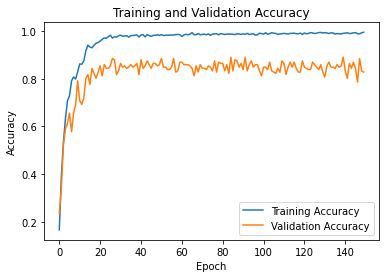

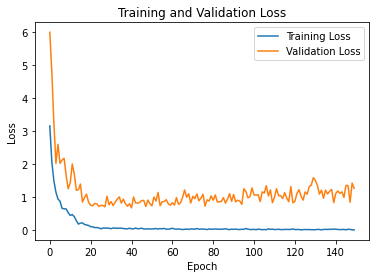

In [ ]:
import matplotlib.pyplot as plt

acc = transfer_learning_history.history['accuracy'] 
val_acc = transfer_learning_history.history['val_accuracy']

loss = transfer_learning_history.history['loss']
val_loss = transfer_learning_history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.figure()

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss') 
plt.title('Training and Validation Loss')
plt.show()

# Save Model

In [ ]:
def save_model_result(model):
	'''
		-- model : compiled model on the given data.
	'''

	# Extract model result data to separate data vectors
	data_val_acc = list(model.history.history['val_accuracy'])
	data_acc = list(model.history.history['accuracy'])
	data_val_loss = list(model.history.history['val_loss'])
	data_loss = list(model.history.history['loss'])

	# Convert Model result data to dataframe by using dictionary dat structure
	d = {}
	d['val_accuracy'] = data_val_acc
	d['accuracy'] = data_acc
	d['val_loss'] = data_val_loss
	d['loss'] = data_loss

	df = pd.DataFrame(d)
	print(df)

	# Get a current timestamp
	timestamp = str(datetime.datetime.now()).replace(":","-")[:-10].replace(' ', '_')
	filename = '/content/drive/MyDrive/Colab Notebooks/restes/Hasil Training/History{}.csv'.format(timestamp)
	df.to_csv(filename, encoding='utf-8')

	print('\n\nResult data is saved as file: {}'.format(filename))

	return df

In [ ]:
import datetime
import pandas as pd

model = model
df = save_model_result(model)

     val_accuracy  accuracy  val_loss      loss
0        0.234375  0.165899  5.997566  3.164758
1        0.338542  0.388633  4.788505  2.073988
2        0.520833  0.531250  3.250231  1.502660
3        0.588542  0.632104  2.027929  1.156864
4        0.614583  0.707373  2.606503  0.949596
..            ...       ...       ...       ...
145      0.843750  0.993856  1.363000  0.018329
146      0.786458  0.989247  1.355815  0.035262
147      0.885417  0.988479  0.852259  0.031213
148      0.833333  0.993088  1.431210  0.017313
149      0.828125  0.995392  1.273797  0.015037

[150 rows x 4 columns]


Result data is saved as file: /content/drive/MyDrive/Colab Notebooks/restes/Hasil Training/History2021-08-24_06-45.csv


# Testing Custom

In [ ]:
from sklearn.datasets import load_files
from keras.utils import np_utils
import numpy as np

def load_dataset(path):
    data = load_files(path)
    paths = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']))
    return paths, targets

test_files, test_targets = load_dataset('/content/drive/MyDrive/Colab Notebooks/restes/dataset/Putri Navia Splited/Test')

In [ ]:
from tensorflow.keras.preprocessing import image  
# from tensorflow.keras.applications.inception_v3 import preprocess_input
# from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from tqdm import tqdm

def path_to_tensor(img_path):
    #load image, resize ke ukuran 224,224
    img = image.load_img(img_path, target_size=(224, 224))
    #convert gambar jadi 3D tensor (224,224,3)
    x = image.img_to_array(img).astype(np.float32)/255
    # x = image.img_to_array(img)
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

test_tensors = (paths_to_tensor(test_files))

100%|██████████| 171/171 [00:00<00:00, 440.55it/s]


18/18 [==============================] - 5s 108ms/step - loss: 0.7092 - accuracy: 0.8889

Testing loss: 0.7092
Testing accuracy: 0.8889


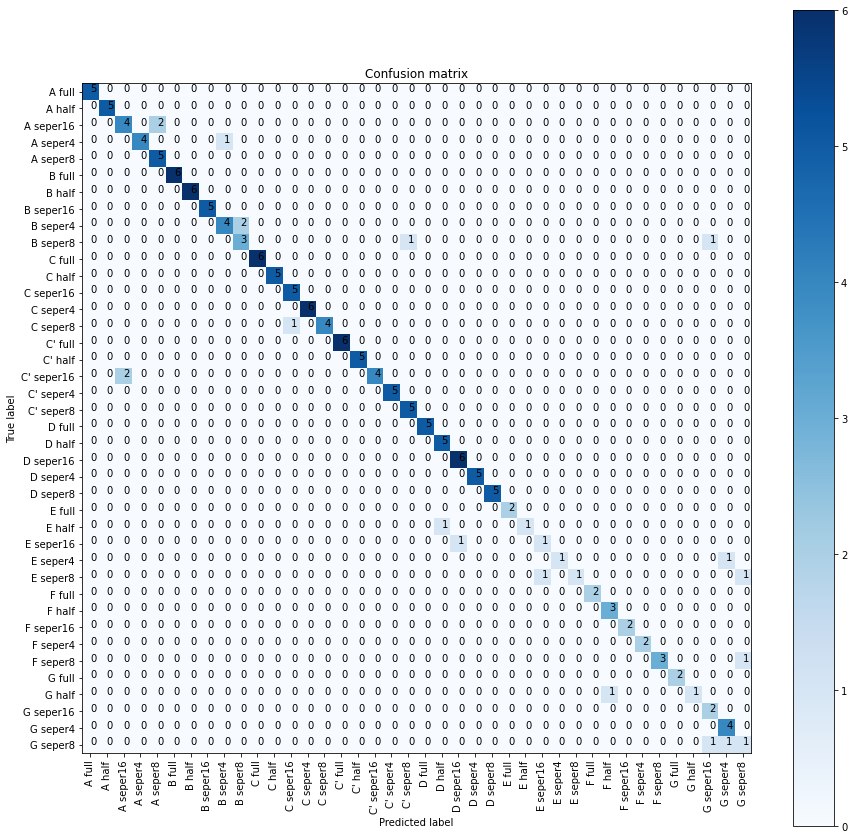

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/restes/Hasil Training/best_model.h5')
result = print('\nTesting loss: {:.4f}\nTesting accuracy: {:.4f}'.format(*model.evaluate(test_tensors, test_targets, batch_size=test_gen.batch_size)))

from sklearn.metrics import confusion_matrix
import numpy as np
fig, ax = plt.subplots(figsize=(15, 15))
cm_labels = ['A full', 'A half', 'A seper16', 'A seper4', 'A seper8', 'B full', 'B half', 'B seper16', 'B seper4', 'B seper8', 'C full', 'C half', 'C seper16', 'C seper4', 'C seper8', "C' full", "C' half", "C' seper16", "C' seper4", "C' seper8", 'D full', 'D half', 'D seper16', 'D seper4', 'D seper8', 'E full', 'E half', 'E seper16', 'E seper4', 'E seper8', 'F full', 'F half', 'F seper16', 'F seper4', 'F seper8', 'G full', 'G half', 'G seper16', 'G seper4', 'G seper8']

cm = confusion_matrix(np.argmax(test_targets, axis=1),
                      np.argmax(model.predict(test_tensors), axis=1))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
indexes = np.arange(len(cm_labels))
for i in indexes:
    for j in indexes:
        plt.text(j, i, cm[i, j])
plt.xticks(indexes, cm_labels, rotation=90)
plt.xlabel('Predicted label')
plt.yticks(indexes, cm_labels)
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.grid(False)
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.models import load_model

from tensorflow.keras import backend as K

test_dir = '/content/drive/MyDrive/Colab Notebooks/restes/dataset/Putri Navia Splited/Test'

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size= 1,
        class_mode='categorical',
        shuffle=False)

model_resnet152 = load_model('/content/drive/MyDrive/Colab Notebooks/restes/Hasil Training/best_model.h5')

#Confusion Matrix and Classification Report
Y_pred_resnet152 = model_resnet152.predict_generator(test_generator, test_generator.samples // test_generator.batch_size)
y_pred_resnet152 = np.argmax(Y_pred_resnet152, axis=1)


print('Confusion Matrix ResNet152')
print(confusion_matrix(test_generator.classes, y_pred_resnet152))
print('Classification Report')
target_names = ['A full', 'A half', 'A seper16', 'A seper4', 'A seper8', 'B full', 'B half', 'B seper16', 'B seper4', 'B seper8', 'C full', 'C half', 'C seper16', 'C seper4', 'C seper8', "C' full", "C' half", "C' seper16", "C' seper4", "C' seper8", 'D full', 'D half', 'D seper16', 'D seper4', 'D seper8', 'E full', 'E half', 'E seper16', 'E seper4', 'E seper8', 'F full', 'F half', 'F seper16', 'F seper4', 'F seper8', 'G full', 'G half', 'G seper16', 'G seper4', 'G seper8']
print(classification_report(test_generator.classes, y_pred_resnet152, target_names=target_names))

#Evaluating model:
x, y = zip(*(test_generator[i] for i in range(len(test_generator))))
x_test, y_test = np.vstack(x), np.vstack(y)
loss_resnet152, acc_resnet152 = model_resnet152.evaluate(x_test, y_test, batch_size=32)

print("Accuracy: " ,acc_resnet152)
print("Loss: ", loss_resnet152)

Found 171 images belonging to 40 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix ResNet152
[[5 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 1 1 1]]
Classification Report
              precision    recall  f1-score   support

      A full       1.00      1.00      1.00         5
      A half       1.00      1.00      1.00         5
   A seper16       0.67      0.67      0.67         6
    A seper4       1.00      0.80      0.89         5
    A seper8       0.71      1.00      0.83         5
      B full       1.00      1.00      1.00         6
      B half       1.00      1.00      1.00         6
   B seper16       1.00      1.00      1.00         5
    B seper4       0.80      0.67      0.73         6
    B seper8       0.60      0.60      0.60         5
      C full       1.00      1.00      1.00         6
      C half       1.00      1.00      1.00         5
   C seper16       0.83      1.00      0.91         5
    C seper4       1.00      1.00      1.00         6
    C seper8       1